In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/Users/adi/Desktop/TA_Adi_V2/QE Statistik V2/logistic_regression/dataset/dataset_keparahan.csv")
df

,No Document,title,Description,Mati,Luka,KerugianBarang,KerugianUang,Pemerkosaan,Keparahan
0,0,Maling Motor Parlente di Pasuruan Gondol Motor...,\-\n\nMaling perlente beraksi di sebuah klinik...,0,0,1,0,0,1
1,1,2 Komplotan Maling Motor Asal Tangerang dan Le...,\-\n\nPolsek Neglasari meringkus dua komplotan...,0,0,2,0,0,1
2,2,Pria di Dairi Nekat Habisi Oppungnya demi Perh...,"\-\n\nSeorang pria di Kabupaten Dairi, bernama...",1,0,1,1,0,3
3,3,"Korban Curanmor Silakan Merapat, Ada 7 Mobil-4...",\-\n\nPolres Bogor menyita 7 mobil dan 48 moto...,0,0,7,0,0,3
4,4,"Kepergok Curi Motor Mahasiswa USU, 2 Pria Ini ...",\-\n\n2 pelaku pencuri sepeda motor milik maha...,0,1,2,0,0,3
...,...,...,...,...,...,...,...,...,...
1122,1202,Maling Spesialis Rumah Kosong Diciduk di Bantul,\-\n\nPolisi menciduk pria inisial FA (28) kar...,0,0,1,0,0,1
1123,1203,Ini TKP Penemuan Mayat Gadis ABG Korban Pembun...,"\-\n\nWarga Desa Kaliputih, Kecamatan Alian, K...",1,0,1,0,0,3
1124,1204,Tetangga Curi Duit Wakil Ketua DPRD Bone Rp 64...,\-\n\nPolisi menetapkan 4 orang tersangka dala...,0,0,0,640000000,0,3
1125,1205,CIMB Niaga Buka Suara Terkait Perampokan Bank ...,\-\n\nPria berinisial BS (43) ditangkap dan di...,0,0,0,0,0,1


In [5]:
df.drop('No Document', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)
df.drop('Description', axis=1, inplace=True)
df=df.dropna(axis=0)

In [6]:
df['Mati']=df.Mati.astype(int)
df['Luka']=df.Luka.astype(int)
df['KerugianBarang']=df.KerugianBarang.astype(int)
df['KerugianUang']=df.KerugianUang.astype(int)
df['Pemerkosaan']=df.Pemerkosaan.astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1126
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Mati            1127 non-null   int64
 1   Luka            1127 non-null   int64
 2   KerugianBarang  1127 non-null   int64
 3   KerugianUang    1127 non-null   int64
 4   Pemerkosaan     1127 non-null   int64
 5   Keparahan       1127 non-null   int64
dtypes: int64(6)
memory usage: 61.6 KB


In [8]:
df.head()

,Mati,Luka,KerugianBarang,KerugianUang,Pemerkosaan,Keparahan
0,0,0,1,0,0,1
1,0,0,2,0,0,1
2,1,0,1,1,0,3
3,0,0,7,0,0,3
4,0,1,2,0,0,3


In [9]:
X = df.iloc[:,df.columns != 'Keparahan']
y = df.Keparahan

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [11]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

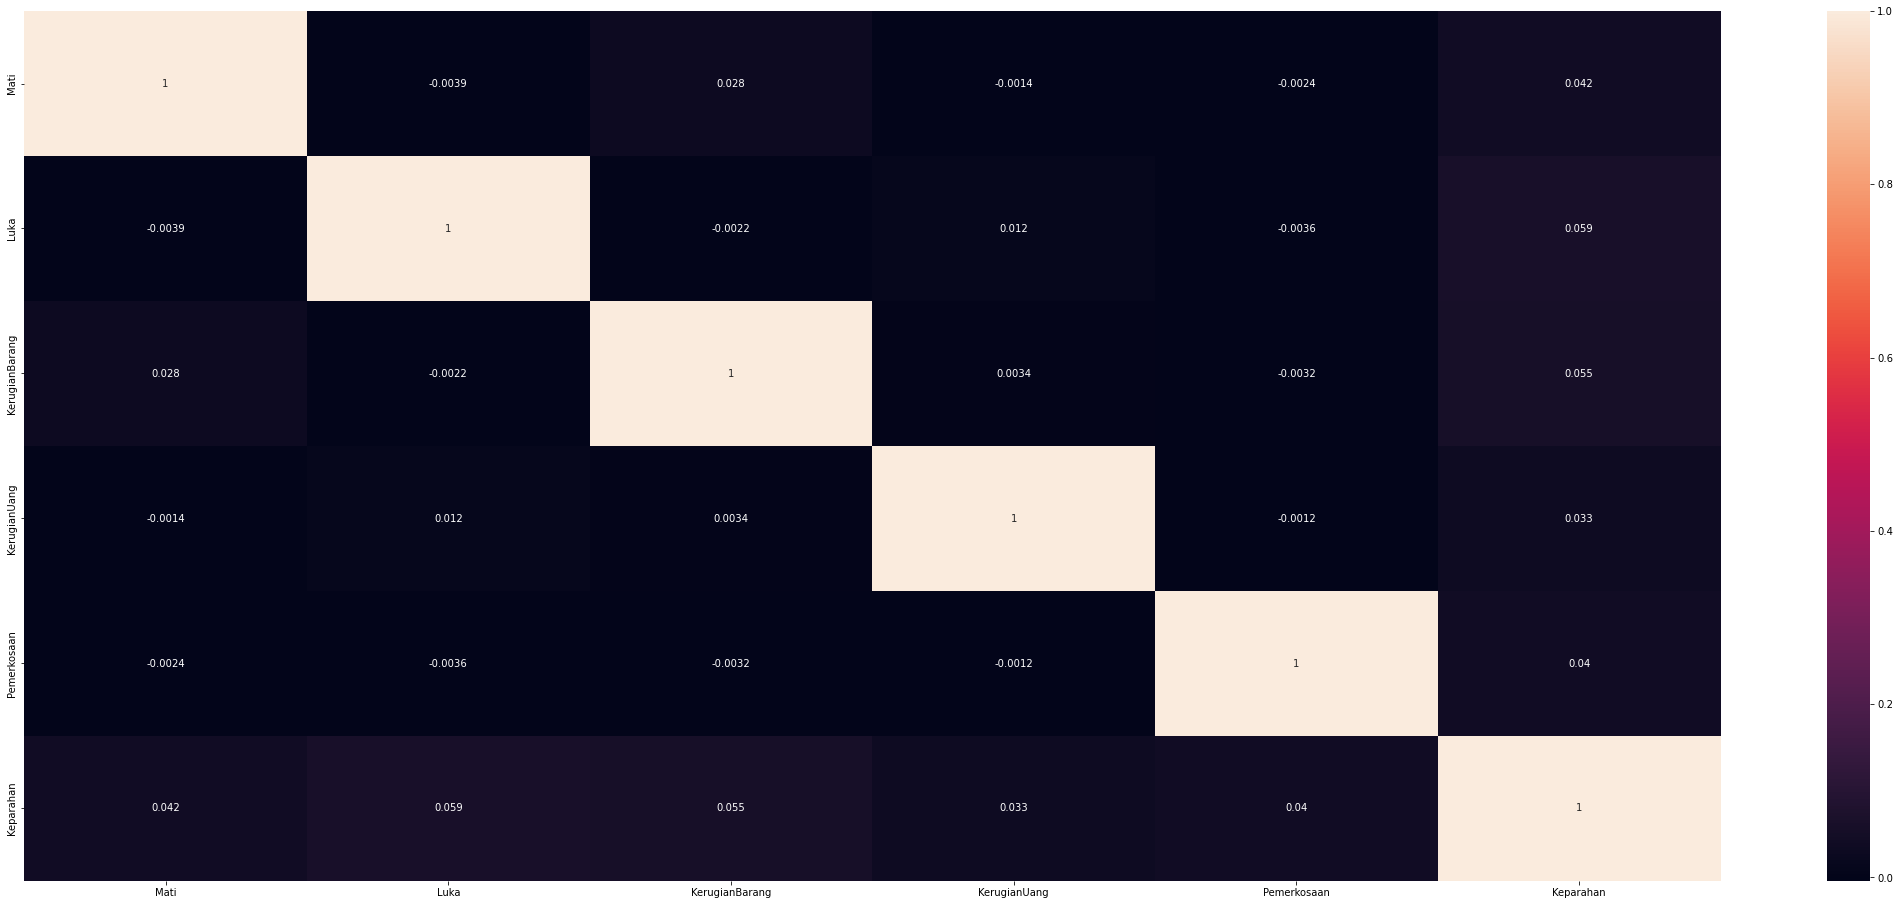

In [12]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [16]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 56.4927857935627


In [17]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 56.19469026548673


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        73
           2       0.00      0.00      0.00        26
           3       0.56      1.00      0.72       127

    accuracy                           0.56       226
   macro avg       0.19      0.33      0.24       226
weighted avg       0.32      0.56      0.40       226



/Users/adi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


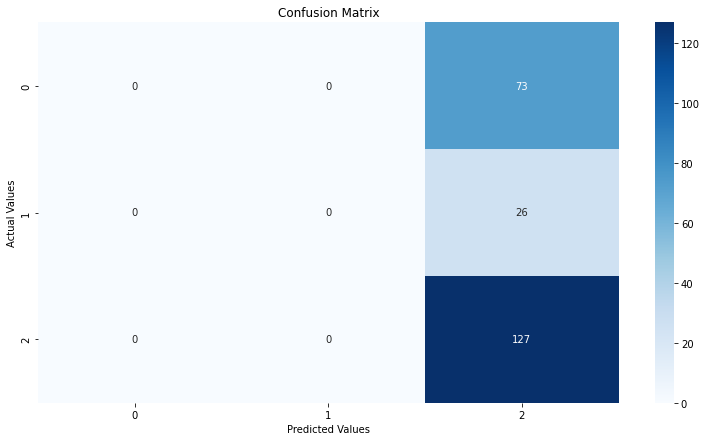

In [19]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')